In [1]:
from funcoes_arima import read_data
from funcoes_arima import arima_model_plot
from funcoes_arima import sarima_model_plot
from funcoes_arima import autoArima
from funcoes_arima import plot_diffs
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

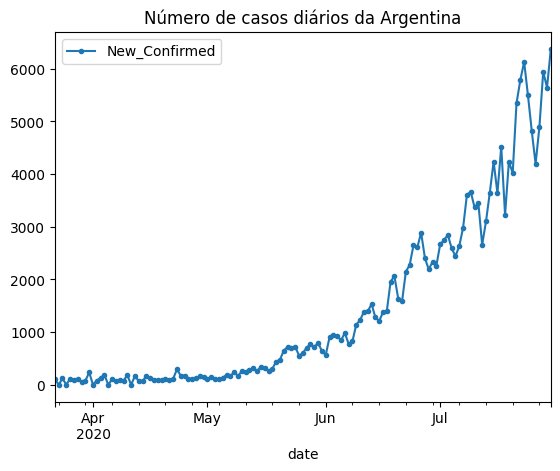

In [2]:
reg_data_ar = read_data('AR')
reg_data_ar = reg_data_ar.loc[reg_data_ar.ge(100).idxmax()[0]:]
reg_data_ar.plot(marker='.')
plt.title('Número de casos diários da Argentina');

In [3]:
print('Total de registros:', len(reg_data_ar))
print('Número de registros para treino:', round(len(reg_data_ar)*0.7, 0))
print('Número de registros para teste:', round(len(reg_data_ar)*0.3, 0))

Total de registros: 131
Número de registros para treino: 92.0
Número de registros para teste: 39.0


In [4]:
train_data = reg_data_ar.iloc[:92]
test_data = reg_data_ar.iloc[92:]
print('Número de registros para treino final:', len(train_data))
print('Número de registros para teste final:', len(test_data))

Número de registros para treino final: 92
Número de registros para teste final: 39


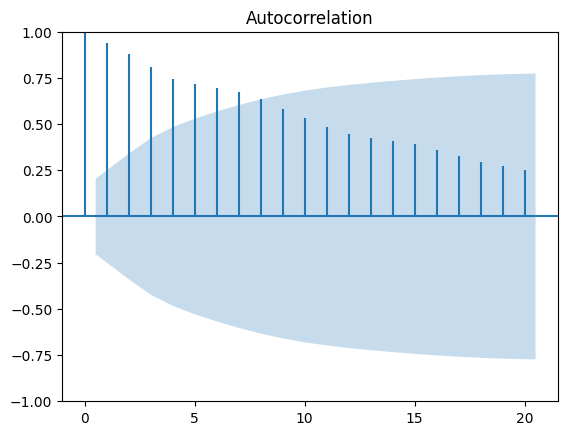

In [5]:
plot_acf(train_data['New_Confirmed'],  marker='');

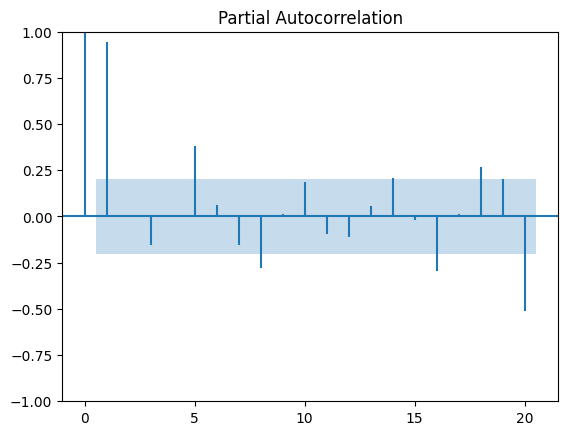

In [6]:
plot_pacf(train_data['New_Confirmed'],  marker='');

ADF Statistic 0 Order: 4.349557
p-value: 1.000000
ADF Statistic 1st Order: -1.804635
p-value: 0.378163
ADF Statistic 2nd Order: -6.866858
p-value: 0.000000
ADF Statistic 3th order: -6.327233
p-value: 0.000000


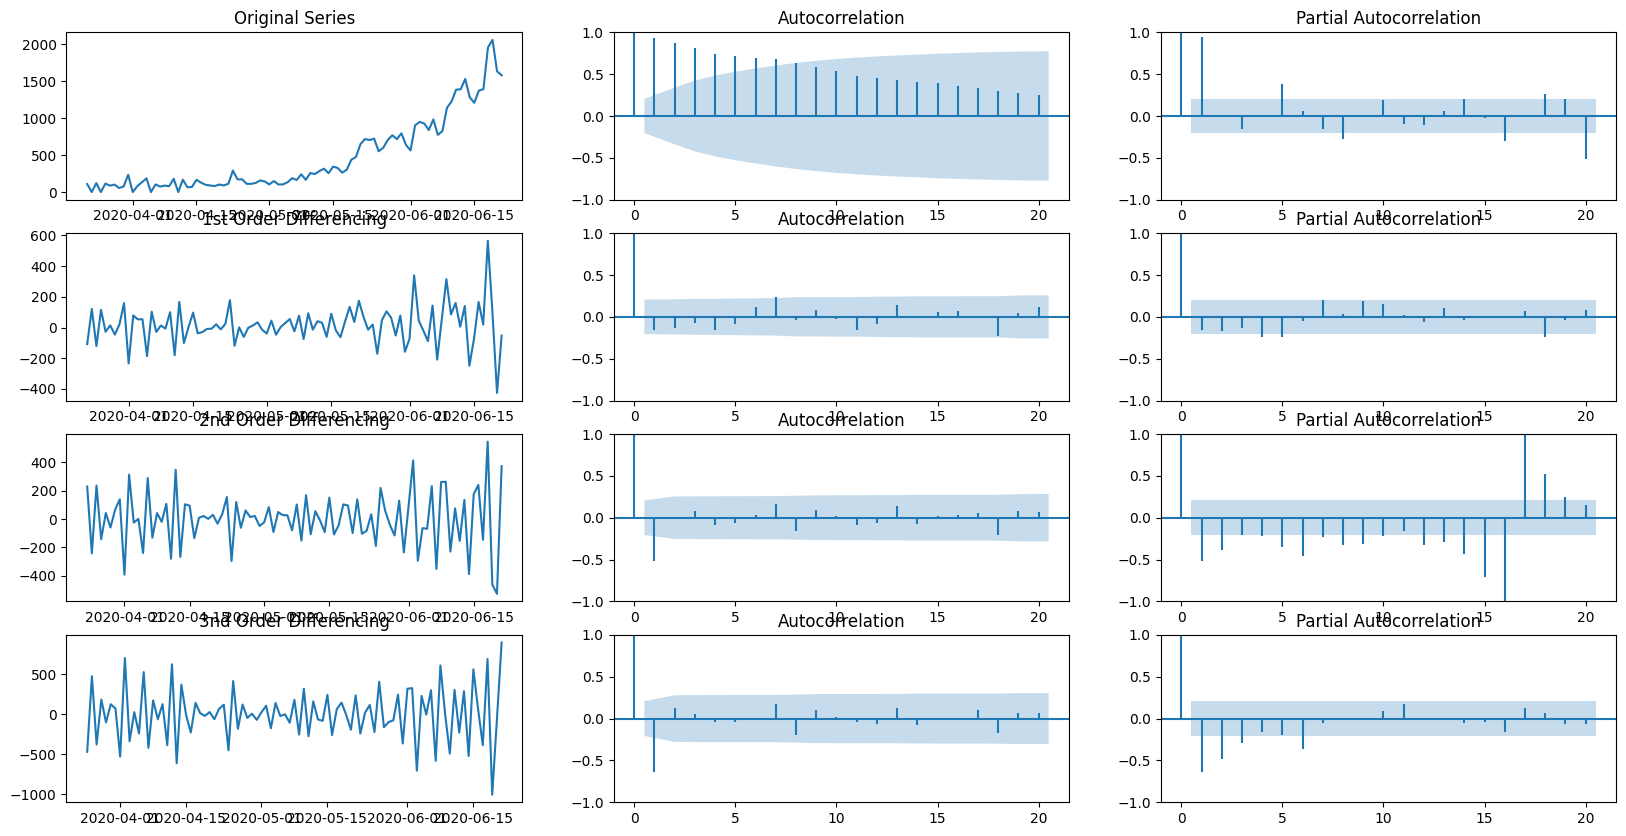

In [7]:
plot_diffs(train_data)

                               SARIMAX Results                                
Dep. Variable:          New_Confirmed   No. Observations:                   92
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -577.998
Date:                Fri, 20 Jan 2023   AIC                           1161.997
Time:                        16:40:20   BIC                           1169.562
Sample:                    03-22-2020   HQIC                          1165.050
                         - 06-21-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        652.1782    509.222      1.281      0.200    -345.879    1650.236
ar.L1          0.9784      0.021     47.444      0.000       0.938       1.019
sigma2      1.621e+04   1376.346     11.775      0.0

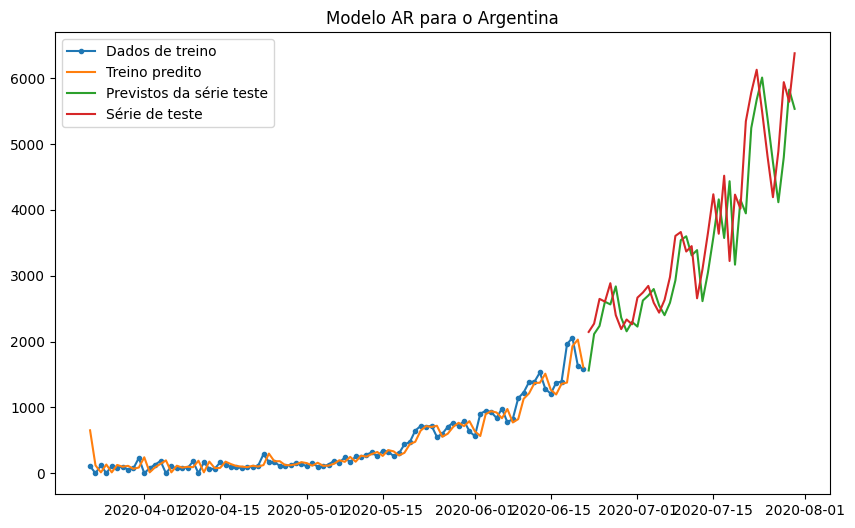

In [8]:
arima_model_plot(train_data, test_data, p=1, model_name='AR', country='Argentina')

                               SARIMAX Results                                
Dep. Variable:          New_Confirmed   No. Observations:                   92
Model:                 ARIMA(0, 0, 7)   Log Likelihood                -595.285
Date:                Fri, 20 Jan 2023   AIC                           1208.570
Time:                        16:40:22   BIC                           1231.266
Sample:                    03-22-2020   HQIC                          1217.730
                         - 06-21-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        463.5296    129.190      3.588      0.000     210.321     716.738
ma.L1          1.0352     15.199      0.068      0.946     -28.755      30.825
ma.L2          0.9520     15.969      0.060      0.9

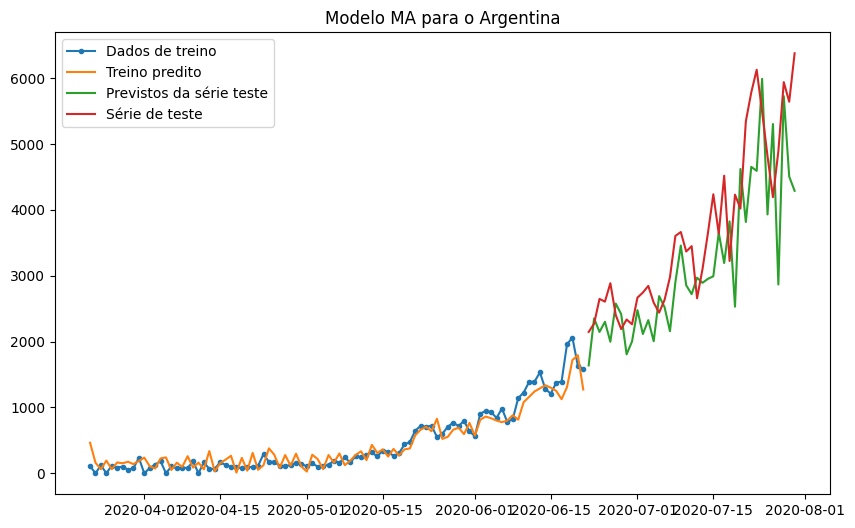

In [9]:
arima_model_plot(train_data, test_data, q=7, model_name='MA', country='Argentina')

                               SARIMAX Results                                
Dep. Variable:          New_Confirmed   No. Observations:                   92
Model:                 ARIMA(2, 2, 7)   Log Likelihood                -551.921
Date:                Fri, 20 Jan 2023   AIC                           1123.843
Time:                        16:42:48   BIC                           1148.841
Sample:                    03-22-2020   HQIC                          1133.923
                         - 06-21-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2440      0.113     11.032      0.000       1.023       1.465
ar.L2         -0.9780      0.086    -11.367      0.000      -1.147      -0.809
ma.L1         -2.6724      0.216    -12.368      0.0

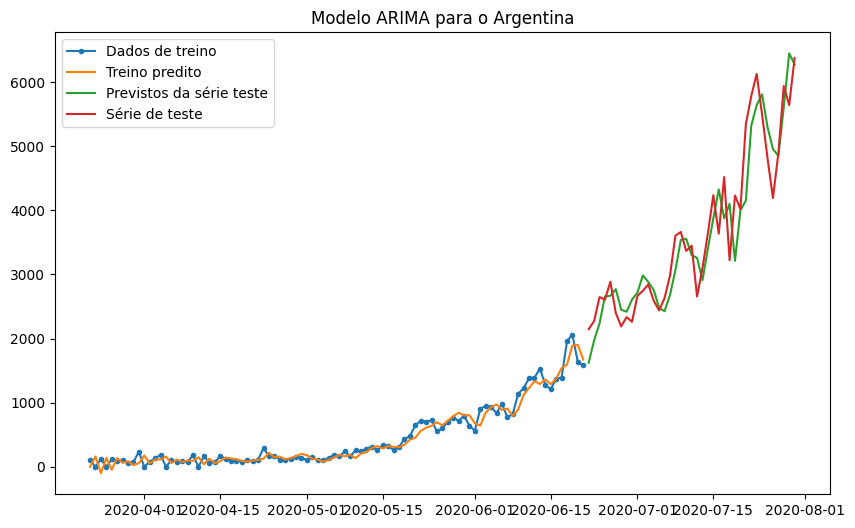

In [16]:
arima_model_plot(train_data, test_data, p=2, d=2, q=7, model_name='ARIMA', country='Argentina')

In [11]:
autoArima(train_data)

ARIMA(order=(0, 1, 2), scoring_args={}, seasonal_order=(0, 1, 2, 7),
      suppress_warnings=True)

                                    SARIMAX Results                                    
Dep. Variable:                   New_Confirmed   No. Observations:                   92
Model:             ARIMA(0, 1, 2)x(0, 1, 2, 7)   Log Likelihood                -517.741
Date:                         Fri, 20 Jan 2023   AIC                           1045.482
Time:                                 16:40:49   BIC                           1057.637
Sample:                             03-22-2020   HQIC                          1050.368
                                  - 06-21-2020                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4574      0.087     -5.235      0.000      -0.629      -0.286
ma.L2         -0.1577      0.113     -1.390      0.164     

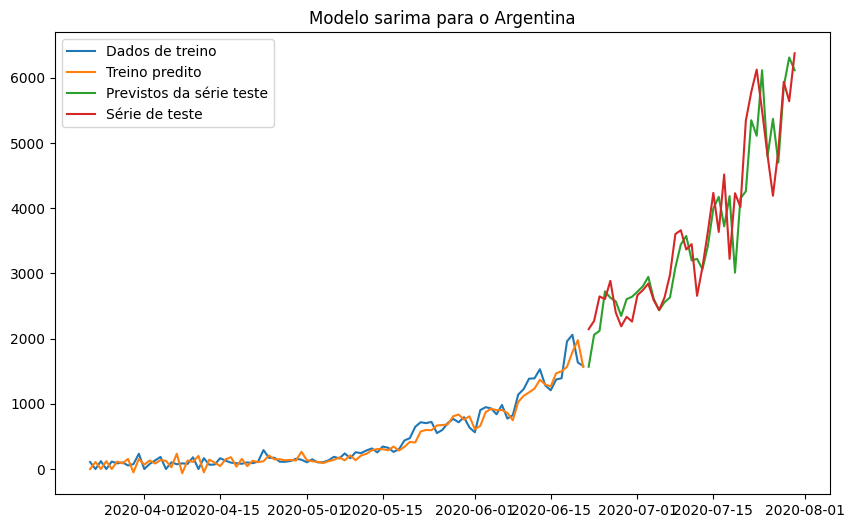

In [12]:
sarima_model_plot(train_data, test_data, p=0, d=1, q=2, P=0, D=1, Q=2, m=7, country='Argentina', model_name='sarima')